# AI-Powered Analysis of Earnings Call Transcripts: The Future of Financial Analysis

Artificial Intelligence (AI) is revolutionizing the way financial analysts interpret and understand earnings call transcripts. Traditionally, analysts have manually sifted through hours of conference call recordings and transcripts to gather insights, but modern AI tools offer a more efficient and effective solution. These tools leverage Natural Language Processing (NLP), Machine Learning (ML), and data analytics to automatically analyze, interpret, and summarize vast amounts of textual data.

In [71]:
def get_earningscall_secret_api_key():
    with open(".earnings-call-api-key", "r") as fd:
        return fd.read().strip()

In [45]:
import earningscall

earningscall.api_key = get_earningscall_secret_api_key()

In [76]:
from earningscall import get_company
from earningscall.company import Company

# Initialize the Earnings Call API
company = get_company("AAPL")

# Fetch the transcript of a specific earnings call
transcript = company.get_transcript(quarter=1, year=2024)
print(f"Transcript: \"{transcript.text[:100]}\"")

Transcript: "Good day, and welcome to the Apple Q1 Fiscal Year 2024 Earnings Conference Call. Today's call is bei"


In [77]:
from textblob import TextBlob

# Perform sentiment analysis on the transcript
blob = TextBlob(transcript.text)
sentiment = blob.sentiment

# Print the results
print(f"Sentiment Polarity: {sentiment.polarity}")
print(f"Sentiment Subjectivity: {sentiment.subjectivity}")

Sentiment Polarity: 0.18496337217726486
Sentiment Subjectivity: 0.46769073323131016


In [52]:
from typing import Iterator

def get_datapoints(company: Company) -> Iterator[list]:
    for event in company.events():
        transcript = company.get_transcript(event=event)  # Fetch the earnings call transcript for this event
        if not transcript:
            continue
        blob = TextBlob(transcript.text)
        sentiment = blob.sentiment
        x = sentiment.polarity
        y = sentiment.subjectivity
        yield [x, y]

In [65]:
def get_all_datapoints(n: int = 50):
    i = 0
    for company in get_sp500_companies():
        i += 1
        for datapoint in get_datapoints(company):
            yield datapoint
        if i >= n:
            break

Next, call the EarningsCall API to get sentiment for all S&P 500 Companies.  This takes a long time.


In [64]:
x, y = list(zip(*list(get_all_datapoints(n=500))))

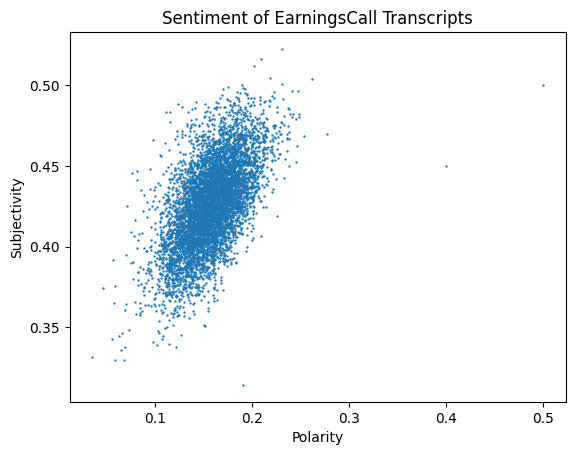

In [70]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()

# Map each onto a scatterplot we'll create with Matplotlib
ax.scatter(x=x, y=y, s=0.5)
ax.set(title="Sentiment of EarningsCall Transcripts",
       xlabel='Polarity',
       ylabel='Subjectivity')
plt.show()